In [14]:
!pip install -r requirements.txt

  Using cached qiskit_ibm_runtime-0.9.0-py3-none-any.whl (175 kB)
  Using cached ibm-platform-services-0.31.1.tar.gz (248 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.4/190.4 KB 1.4 MB/s eta 0:00:003.1 MB/s eta 0:00:01
  Using cached ibm-cloud-sdk-core-3.16.2.tar.gz (50 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ibm-platform-services: filename=ibm_platform_services-0.31.1-py3-none-any.whl size=263974 sha256=bd3c63d31608b4b02b414ede3734255fdabc8b05ad602110419470800cfd7244
  Stored in directory: /home/v/.cache/pip/wheels/1c/e2/91/56188870f44d7279a074d8a33de4be1f8ae132e32fd688d9b3
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-3.16.2-py3-none-any.whl size=83556 sha256=09b17e2a27242f4b5310d480f93ea52d87282af459ca25

In [4]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 8.9 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01


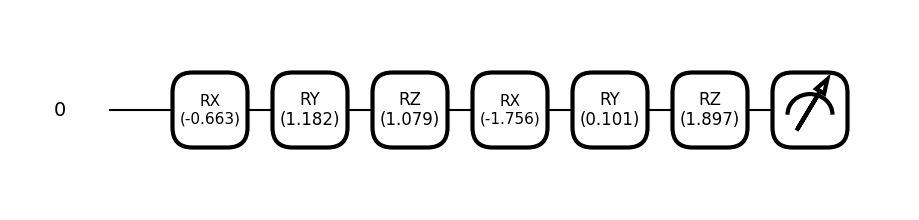

In [11]:
''' CHECK THE SET UP PRINTING THIS CIRCUIT'''
from tools import *
def vqa_gen_state(n_qubits, depht=None):
    #n_qubits = 1
    if depht == None:
        depht = n_qubits+1
    n = 3*n_qubits*(1+depht)
    params = random_params(n)
    device = qml.device('qiskit.aer', wires=n_qubits, backend='qasm_simulator')
    @qml.qnode(device, interface="torch")
    def circuit(params, M=None):
        #print(j)
        aux = 0
        for deep in range(0,depht):

            qml.RX(params[0+aux], wires=0)
            qml.RY(params[1+aux], wires=0)
            qml.RZ(params[2+aux], wires=0)
            aux += 3
        return qml.expval(qml.Hermitian(M, wires=0))
    return circuit, params
n_qubits = 1
circuit, params = vqa_gen_state(n_qubits)
target_vector, target_op = init_state_gen_state(np.pi/2,0)
#best_params, f = train(10, circuit, params, target_op)
fig, ax = qml.draw_mpl(circuit, decimals=3)(params, target_op)
plt.show()

In [15]:
from qiskit import IBMQ

provider = IBMQ.load_account()
provider.runtime.pprint_programs()

ibmqfactory.load_account:WARNING:2023-02-22 16:40:54,854: Credentials are already in use. The existing account in the session will be replaced.


vqe-runtime-DpmwMvJDv3:
  Name: vqe-runtime
  Description: A sample VQE program.
vqe-runtime-XgaDKVyaq3:
  Name: vqe-runtime
  Description: A sample VQE program.
vqe-runtime-WgKN9leN93:
  Name: vqe-runtime
  Description: A sample VQE program.
vqe-runtime-k6rkBzVAr3:
  Name: vqe-runtime
  Description: A sample VQE program.
vqe-runtime-XgaJOXdap2:
  Name: vqe-runtime
  Description: A sample VQE program.
vqe-runtime-y3OVWeBww6:
  Name: vqe-runtime
  Description: A sample VQE program.
vqe-runtime-Ag7B794x73:
  Name: vqe-runtime
  Description: A sample VQE program.
vqe-runtime-ypbkBbwXj6:
  Name: vqe-runtime
  Description: A sample VQE program.
vqe-runtime-y3n79Rx8kg:
  Name: vqe-runtime
  Description: A sample VQE program.
hello-world:
  Name: hello-world
  Description: A sample runtime program.
qaoa:
  Name: qaoa
  Description: Qiskit Runtime QAOA program.
torch-train:
  Name: torch-train
  Description: (DEPRECATED) A runtime program to train hybrid QNN models with Pytorch.
torch-infer:
 

In [13]:

program = provider.runtime.program('vqe-runtime')
print(program)

RuntimeProgramNotFound: 'Program not found: 404 Client Error: Not Found for url: https://runtime-us-east.quantum-computing.ibm.com/programs/vqe-runtime. {"errors":[{"code":"not_found","message":"program not found","more_info":"https://cloud.ibm.com/apidocs/quantum-computing#error-handling"}],"trace":"cfr6e5gpvdjqfgq3k0v0"}'